![dance party](spy-x-family-dance.gif)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [125]:
import pandas as pd
data = pd.read_csv('data/spotify.csv')
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113022,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999.0,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113023,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000.0,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113024,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466.0,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113025,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893.0,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## ⌛️ Time is ticking. Good luck!

## Import libraries

In [126]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [127]:
spotify = data.copy()

In [128]:
audio_fea=['acousticness','danceability','loudness','duration_ms','energy','speechiness','valence', 'tempo', 'instrumentalness']

In [129]:
spotify = spotify[audio_fea]
spotify.head()

,acousticness,danceability,loudness,duration_ms,energy,speechiness,valence,tempo,instrumentalness
0,0.0322,0.676,-6.746,230666.0,0.4610,0.1430,0.715,87.917,0.000001
1,0.9240,0.420,-17.235,149610.0,0.1660,0.0763,0.267,77.489,0.000006
2,0.2100,0.438,-9.734,210826.0,0.3590,0.0557,0.120,76.332,0.000000
3,0.9050,0.266,-18.515,201933.0,0.0596,0.0363,0.143,181.740,0.000071
4,0.4690,0.618,-9.681,198853.0,0.4430,0.0526,0.167,119.949,0.000000


## Covert duration_ms to min

In [130]:
# Convert duration_ms to minutes
spotify['duration_min'] = spotify['duration_ms'] / 60000

spotify.drop('duration_ms', axis=1, inplace=True)

In [131]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      113027 non-null  float64
 1   danceability      113027 non-null  float64
 2   loudness          113027 non-null  float64
 3   energy            113027 non-null  float64
 4   speechiness       113027 non-null  float64
 5   valence           113027 non-null  float64
 6   tempo             113027 non-null  float64
 7   instrumentalness  113027 non-null  float64
 8   duration_min      113027 non-null  float64
dtypes: float64(9)
memory usage: 7.8 MB


In [132]:
print(f'Number of duplicate rows: {spotify.duplicated().sum()}\nNumber of null values:\n{spotify.isna().sum()}')

Number of duplicate rows: 30337
Number of null values:
acousticness        0
danceability        0
loudness            0
energy              0
speechiness         0
valence             0
tempo               0
instrumentalness    0
duration_min        0
dtype: int64


In [133]:
spotify.describe()

,acousticness,danceability,loudness,energy,speechiness,valence,tempo,instrumentalness,duration_min
count,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000
mean,0.312539,0.568038,-8.219194,0.642947,0.084294,0.475278,122.267773,0.154746,3.803328
std,0.331113,0.172955,4.983277,0.250418,0.104315,0.259022,29.961328,0.308316,1.783351
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016700,0.457000,-9.971000,0.474000,0.035900,0.261000,99.559500,0.000000,2.905958
50%,0.166000,0.581000,-6.981000,0.686000,0.048900,0.465000,122.043000,0.000041,3.550883
75%,0.592000,0.695000,-4.993500,0.854000,0.084500,0.684000,140.093000,0.046900,4.359367
max,0.996000,0.985000,4.532000,1.000000,0.965000,0.995000,243.372000,1.000000,87.288250


## 1- Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.

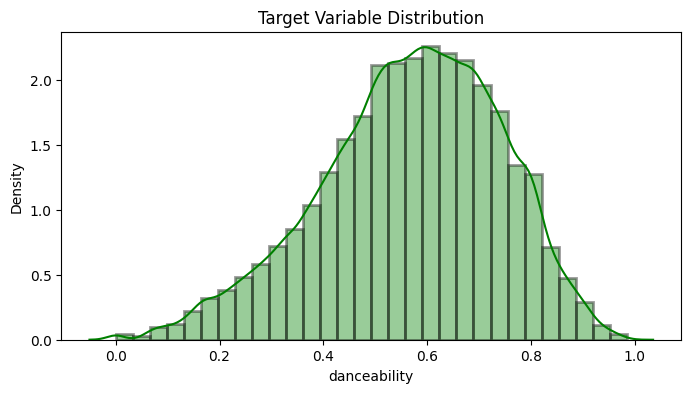

In [134]:
plt.figure(figsize=[8,4])
sns.distplot(spotify["danceability"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

## loudness & duration_ms cols have lots of outliers 

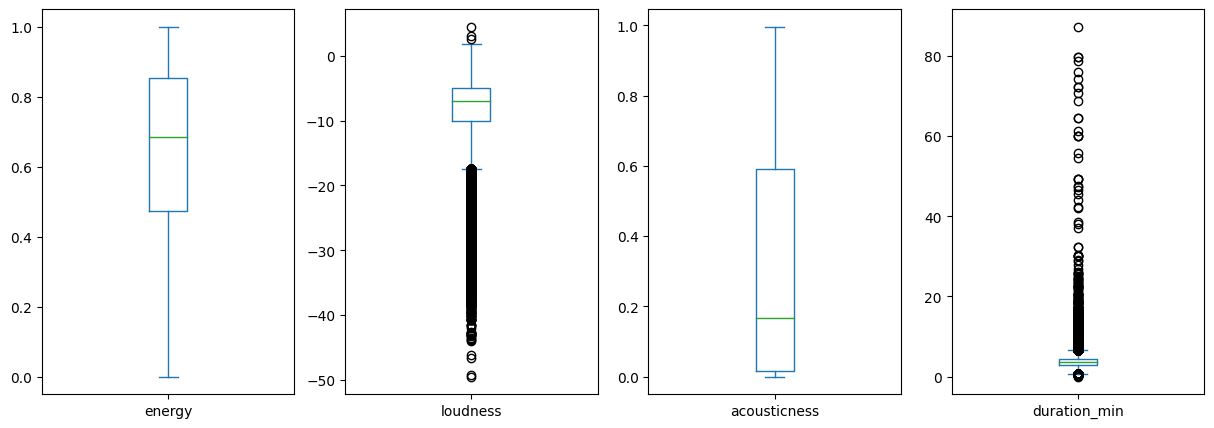

In [135]:
f, ax = plt.subplots(1,4,figsize=(15,5))
spotify["energy"].plot(kind="box",ax=ax[0])
spotify["loudness"].plot(kind="box",ax=ax[1])
spotify["acousticness"].plot(kind="box",ax=ax[2])
spotify["duration_min"].plot(kind="box",ax=ax[3]);

## - Songs are very positive & happier
## - Speechiness very skewd means speechiness songs are minority
## - Instrumentalness very skewd most of the song instrumental (less rap songs)

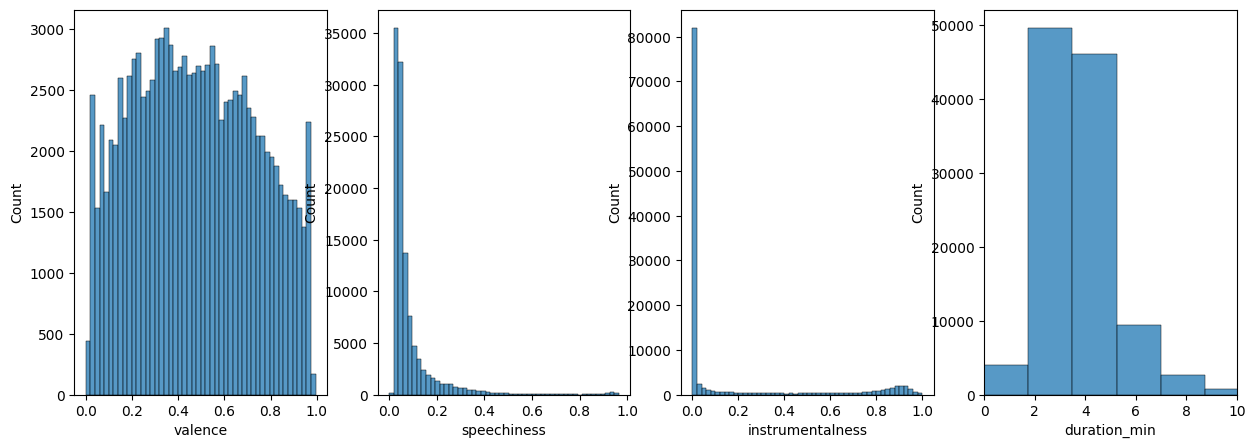

In [136]:
f, ax = plt.subplots(1,4,figsize=(15,5))
sns.histplot(spotify['valence'], ax=ax[0], bins=50)
sns.histplot(spotify['speechiness'], ax=ax[1], bins=50)
sns.histplot(spotify['instrumentalness'], ax=ax[2], bins=50)
sns.histplot(spotify['duration_min'], ax=ax[3], bins=50)
ax[3].set_xlim(0, 10);

## - The Music is danceable and have energy 💃
## - Loudness is not majority
## - Seems like acoustic music not really preferable by people

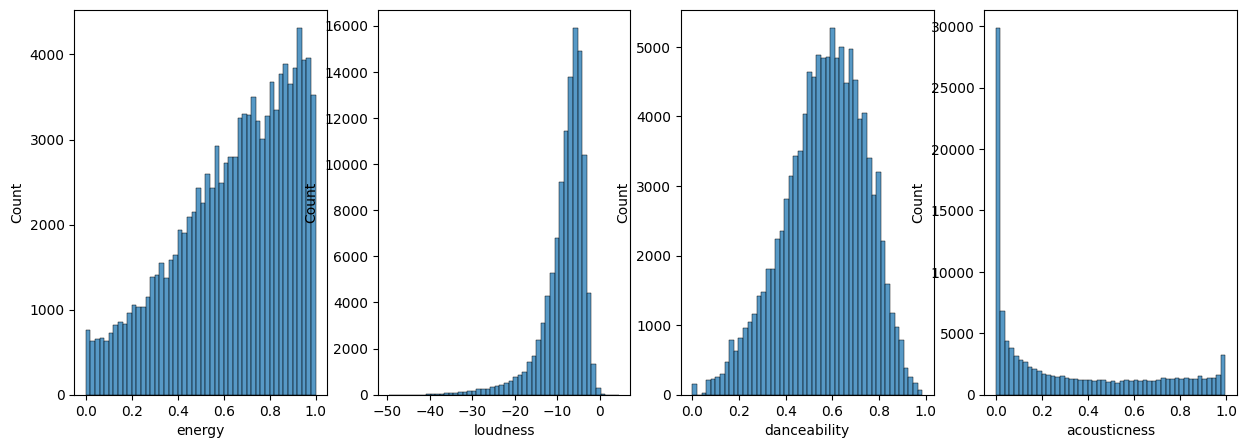

In [137]:
f, ax = plt.subplots(1,4,figsize=(15,5))
sns.histplot(spotify['energy'], ax=ax[0], bins=50)
sns.histplot(spotify['loudness'], ax=ax[1], bins=50)
sns.histplot(spotify['danceability'], ax=ax[2], bins=50)
sns.histplot(spotify['acousticness'], ax=ax[3], bins=50);

## Using Interquartile Range (IQR) Method we will remove the outliers

In [138]:
def remov_outliers(data_):
    q1 = np.percentile(data_, 25)
    q3 = np.percentile(data_, 75)
    iqr = 1.5 * (q3 - q1)

    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    return spotify[(data_ >= lower_bound) & (data_ <= upper_bound)]

spotify = remov_outliers(spotify['duration_min'])
spotify = remov_outliers(spotify["loudness"])

## Seems like there is some corr between Loudness & Energy

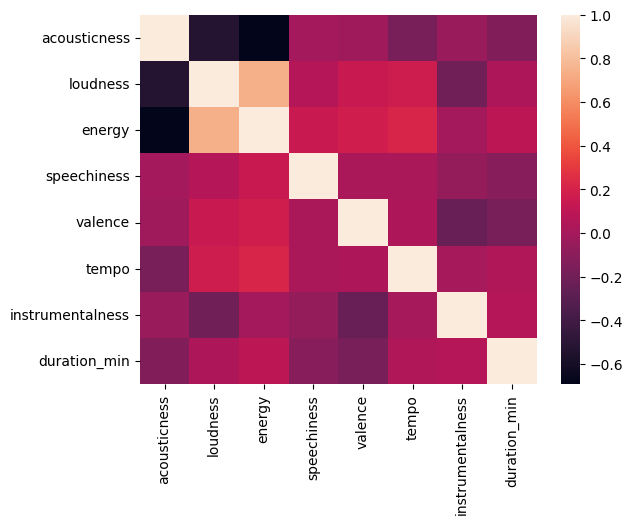

In [139]:
corr = spotify.drop(columns="danceability").corr()
sns.heatmap(corr);

## Seems like Loudness & Energy a little linearly dependent relationship

Text(0.5, 1.0, 'Loudness & Energy Relations')

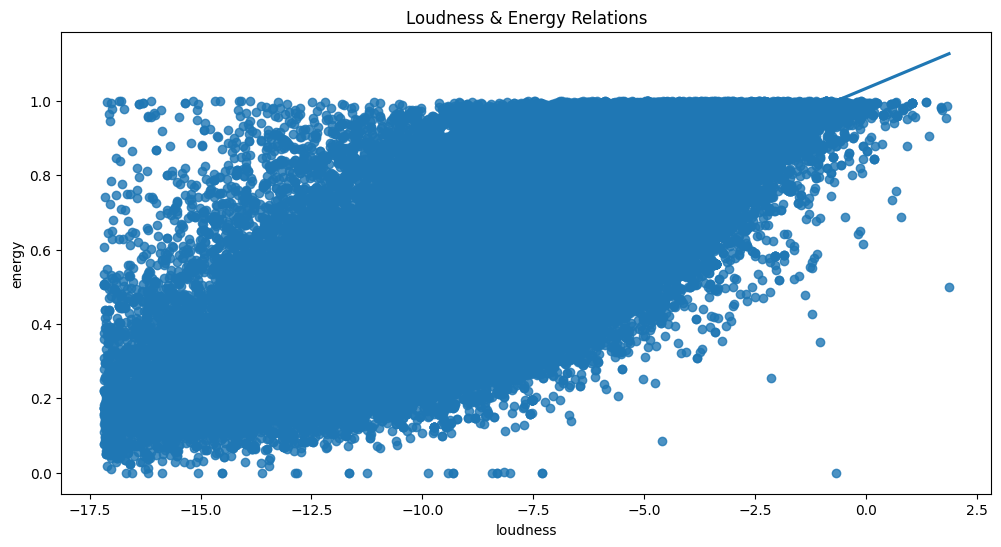

In [140]:
plt.figure(figsize=(12,6))
sns.regplot(data=spotify,x="loudness",y="energy")
plt.title("Loudness & Energy Relations")

## Scaling tempo, duration_min and loudness cols

In [142]:
def calculate_max_min(dataset):
    print(f'Max values: \n{np.max(dataset, axis=0)},\n Min values: {np.min(dataset, axis=0)}')
calculate_max_min(spotify)

Max values: 
acousticness          0.996000
danceability          0.985000
loudness              1.864000
energy                1.000000
speechiness           0.963000
valence               0.995000
tempo               222.605000
instrumentalness      0.999000
duration_min          6.537767
dtype: float64,
 Min values: acousticness         0.000000
danceability         0.000000
loudness           -17.185000
energy               0.000000
speechiness          0.000000
valence              0.000000
tempo                0.000000
instrumentalness     0.000000
duration_min         0.728317
dtype: float64


In [143]:
scaler = MinMaxScaler()
tempo_values = spotify[['tempo', 'duration_min', 'loudness']].values
scaled_tempo = scaler.fit_transform(tempo_values)
spotify[['tempo', 'duration_min', 'loudness']] = scaled_tempo

calculate_max_min(spotify)

Max values: 
acousticness        0.996
danceability        0.985
loudness            1.000
energy              1.000
speechiness         0.963
valence             0.995
tempo               1.000
instrumentalness    0.999
duration_min        1.000
dtype: float64,
 Min values: acousticness        0.0
danceability        0.0
loudness            0.0
energy              0.0
speechiness         0.0
valence             0.0
tempo               0.0
instrumentalness    0.0
duration_min        0.0
dtype: float64


## Develop and apply a machine learning model that predicts a song's danceability.

In [144]:
X = spotify.drop(columns="danceability").values
y = spotify['danceability'].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [146]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
regressor_mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", regressor_mse)

0.6439093492888276
[-0.12868315  0.14743091 -0.27009697  0.22741217  0.31545344 -0.17806282
  0.03613376 -0.00633954]
Mean Squared Error: 0.018985102965087035


In [147]:
y_pred = regressor.predict(X)
df_output = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df_output)


        Actual  Predicted
0        0.676   0.780388
1        0.438   0.564012
2        0.618   0.487855
3        0.688   0.694110
4        0.407   0.474464
...        ...        ...
101754   0.331   0.492550
101755   0.172   0.451040
101756   0.629   0.626062
101757   0.587   0.530853
101758   0.526   0.651643

[101759 rows x 2 columns]


## XGBreg model

In [148]:
xgb_model = XGBRegressor().fit(X_train, y_train)
xgb_ftr_imp = xgb_model.feature_importances_
feature_importances_df = pd.DataFrame(xgb_ftr_imp, index = spotify.select_dtypes("number").drop(columns="danceability").columns) \
.reset_index() \
.rename(columns = {0: 'importance', 'index': 'feature'}) \
.sort_values('importance', ascending = False)

Mean Squared Error: 0.0100299207138226
R-squared: 0.6123070393909047


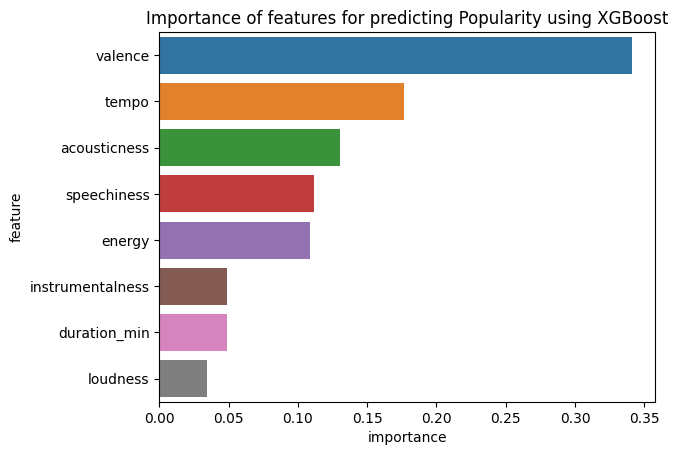

In [149]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
xgb_model_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", xgb_model_mse)
print("R-squared:", r2)

sns.barplot(y=feature_importances_df['feature'], x = feature_importances_df['importance']).set_title('Importance of features for predicting Popularity using XGBoost');

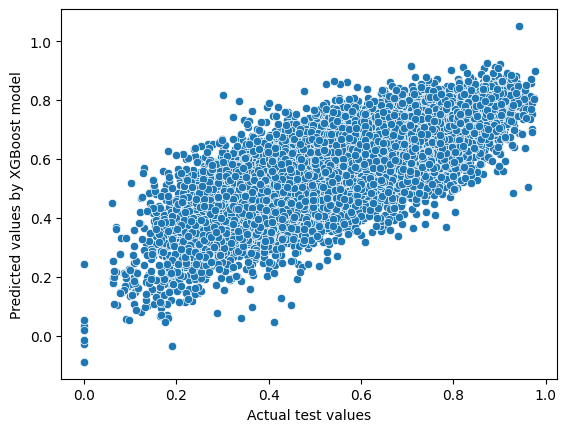

In [150]:
# Plot the scatterplot of actual test values vs predicted values
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='Actual test values', ylabel='Predicted values by XGBoost model')
plt.show()

## RandomForestRegressor

In [151]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
random_forest_mse = mean_squared_error(y_test, Y_pred_rf)

acc_random_forest 68.85
Mean Squared Error: 0.008058247707566189
____________________________________________________________


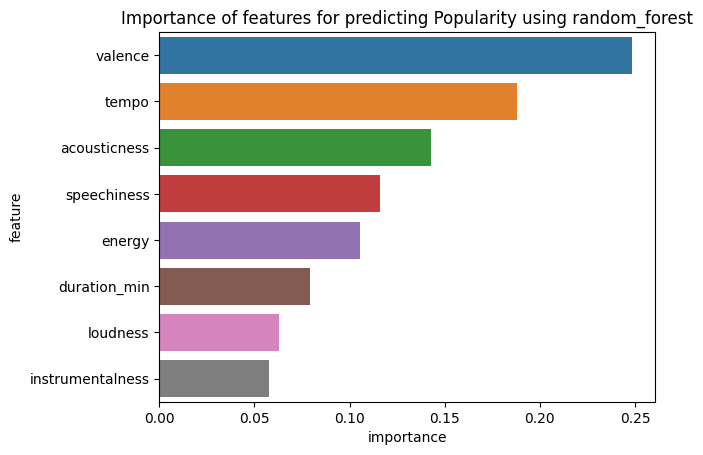

In [152]:
print("acc_random_forest", acc_random_forest)
print("Mean Squared Error:", random_forest_mse)
print('__'*30)
r_forest_imp = random_forest.feature_importances_
feature_importances_df = pd.DataFrame(r_forest_imp, index = spotify.drop(columns="danceability").columns) \
.reset_index() \
.rename(columns = {0: 'importance', 'index': 'feature'}) \
.sort_values('importance', ascending = False)
sns.barplot(y=feature_importances_df['feature'], x = feature_importances_df['importance']).set_title('Importance of features for predicting Popularity using random_forest');

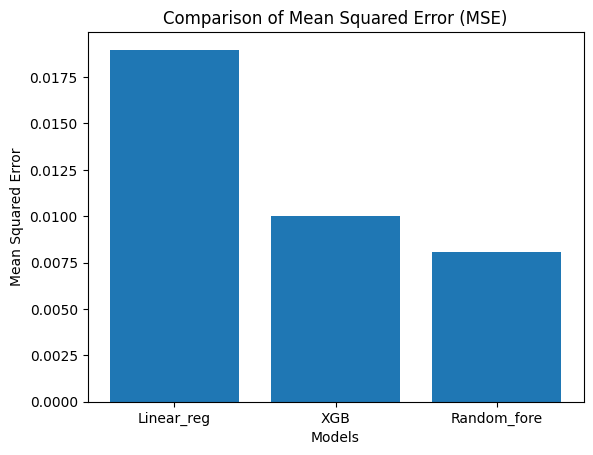

In [153]:
mse_values = [regressor_mse, xgb_model_mse, random_forest_mse]
model_names = ['Linear_reg', 'XGB', 'Random_fore']

plt.bar(model_names, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error (MSE)')

plt.show()

## Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

In [154]:
Y_pred = random_forest.predict(X)

predictions_df = pd.DataFrame({'predicted_value': Y_pred})
predictions_df = pd.concat([predictions_df, data], axis=1)
predictions_df = predictions_df.sort_values(by='predicted_value', ascending=False)
top_50_songs = predictions_df.head(50)
playlist = top_50_songs['track_name'].tolist()
playlist

['Chip Lock',
 'Last Summer',
 'エルトン万次郎',
 '夠鐘',
 '火炎',
 'Involuntary Migration',
 'Pamlico',
 'Ek Pal Ka Jeena',
 '679',
 'Lovely (Piano Arrangement)',
 'One Can Only Dream',
 'This Track Is Not Called Parental Discretion Iz Advised',
 'All of Me (Glee Cast Version)',
 'Sonate II Opus 116 Pour Violoncelle Et Piano - 3ème Mouvement',
 'Surfer Calavera',
 'Xmas Card Photo',
 'デスコ',
 'Naa Vote',
 'Pandas',
 'Blanket, Fart, Strip',
 'Wolves',
 'Two-Player Game',
 'Monster',
 'Just Around the Riverbend - From "Pocahontas" / Soundtrack Version',
 'Big and Ready',
 'Layla - 40th Anniversary Version / 2010 Remastered',
 'Evisceration Plague',
 'Whap Whap (feat. F.S.)',
 '獨家村',
 'Weed Problems',
 '把歌談心',
 '世界是一列由東向西駛往的火車',
 'Marie',
 'Menidan:For Violoncello',
 'Act 1 - Plague of Predator',
 'En Los Sueños',
 '奇洛李維斯回信',
 '說散就散',
 'R U Afraid',
 'Come Back Home',
 'Bekhayali (Arijit Singh Version)',
 'Piano Man',
 'Up Forever',
 'Veera Soora',
 'Z伝説 ~終わりなき革命~',
 'Last One Standing (feat. Polo G